<a href="https://colab.research.google.com/github/spertch9a/Recomendation-engine-python/blob/master/recomendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   userId  ...                                       genres
0       1  ...  Adventure|Animation|Children|Comedy|Fantasy
1       5  ...  Adventure|Animation|Children|Comedy|Fantasy
2       7  ...  Adventure|Animation|Children|Comedy|Fantasy
3      15  ...  Adventure|Animation|Children|Comedy|Fantasy
4      17  ...  Adventure|Animation|Children|Comedy|Fantasy

[5 rows x 6 columns]
finding the most popular items
rating    10
dtype: int64


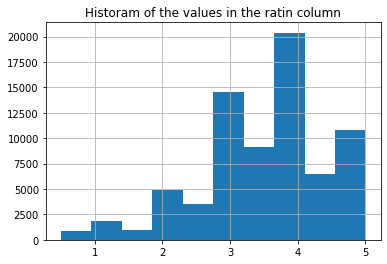

Average rating for each movie
                                               rating
title                                                
'Tis the Season for Love (2015)              1.500000
'burbs, The (1989)                           3.176471
(500) Days of Summer (2009)                  3.666667
00 Schneider - Jagd auf Nihil Baxter (1994)  4.500000
10 Cent Pistol (2015)                        1.250000
Sorted
                                                    rating
title                                                     
I'm the One That I Want (2000)                        5.00
Alien Contamination (1980)                            5.00
Galaxy of Terror (Quest) (1981)                       5.00
The Jinx: The Life and Deaths of Robert Durst (...    5.00
Sherlock - A Study in Pink (2010)                     4.75
CALCULATIN MOVIE FREQUENCY
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The

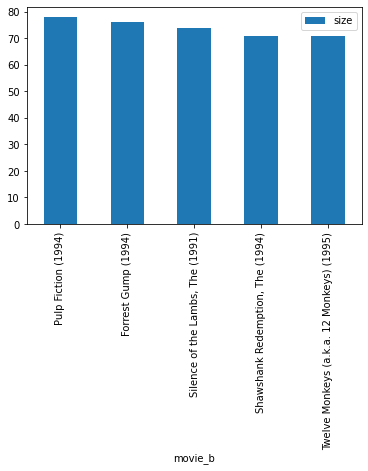

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importing data
userrating_df = pd.read_csv("./user_ratings.csv")
# Inspect the listening_history_df DataFrame
print(userrating_df.head())

# finding the most popular items
print("finding the most popular items")
userrating_df['title'].value_counts()


# Calculate the number of unique values
print(userrating_df[['rating']].nunique())

# Display a histogram of the values in the Rating column
userrating_df['rating'].hist()
plt.title("Historam of the values in the ratin column")
# activate this to show the plot
plt.show()

# Finding the most liked items
print("Average rating for each movie")
avg_rating_df = userrating_df[["title", "rating"]].groupby(['title']).mean()
print(avg_rating_df.head())

# here we note that they are not sorted, we'll sort them then
sorted_avg_rating_df = avg_rating_df.sort_values(by='rating', ascending=False)
print("Sorted")
print(sorted_avg_rating_df.head())

# now we note that some movies have been sorted at first and they're not know,
# a movie with one good review has a solid chance to be sorted as one of the best movies

# calculating the movie frequency

print("CALCULATIN MOVIE FREQUENCY")
movie_frequency = userrating_df["title"].value_counts()
print(movie_frequency)

# we'll take the indexes of the frequently reviewed movies
print("FREQUENTLY REVIEWED MOVIES: ")
frequently_reviewed_movies = movie_frequency[movie_frequency > 100].index
print(frequently_reviewed_movies)

# taking a subset of the movies that are frequent, using the isin function
frequent_movies_df = userrating_df[userrating_df["title"].isin(frequently_reviewed_movies)]

# this subset will be used to show the highest books ratings on average
print("SUBSETTING...")
#frequent_movies_avgs = frequently_reviewed_movies[["title", "rating"]].groupby('title').mean()
#print(frequent_movies_avgs.sort_values(by="rating", ascending=False).head())


# Get the counts of occurrences of each movie title
movie_popularity = userrating_df["title"].value_counts()

# Inspect the most common values
print(movie_popularity.head().index)

# Find the mean of the ratings given to each title
average_rating_df = userrating_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(
    by="rating", ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())


#combining popularity and reviews 
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = userrating_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

#filtering the original userratings_df by the popular movies list to creat a dataframe
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = userrating_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings = userrating_df[userrating_df["title"].isin(popular_movies)]

# Inspect the movies watched over 50 times
print(popular_movies_rankings)


#combining popularity and reviews 
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = userrating_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings =  userrating_df[userrating_df["title"].isin(popular_movies)]

# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').head()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())


#making sugestion by finding the similar
#i mean movies watched by the same person


#in this section  we'll study this part 
#for example we'll find the most common pairs and we'll sort them
print("FIDNING PAIRS")

from itertools import permutations

#defining the function that'll make the pairs for us, commenting the function after it 

def create_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values, 2 )), columns=['movie_a', 'movie_b'] )

    return pairs

"""
permutations(list, length_of_permutations) generates iterable object containing all permutations
list() converts this object to a usable list
pd.dataFrame() converts the list to a DataFrame containing the columns movie_a and movie_b
"""

#applying the function the data
movie_pairs = userrating_df.groupby("userId")['title'].apply(create_pairs)
#cleaning up the results
movie_pairs = movie_pairs.reset_index(drop = True)
print(movie_pairs.head())

# counting the pairings
pair_counts = movie_pairs.groupby(['movie_a', 'movie_b']).size()
pair_counts_df = pair_counts.to_frame(name= 'size').reset_index()
print("PAIR COUNTS DF")
print(pair_counts_df.head())

#loking up recomendataions
pair_counts_sorted = pair_counts_df.sort_values('size', ascending = False)

pair_counts_sorted[pair_counts_sorted['movie_a'] == 'Toy Story (1995)']



# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_pairs.groupby(['movie_a', 'movie_b']).size()

# Inspect the results
print(combination_counts.head())

# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_pairs.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())



#making the first movie recomendations 


# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

# Find the movies most frequently watched by people who watched Thor
thor_df = combination_counts_df[combination_counts_df['movie_a'] == 'Heat (1995)']

# Plot the results
print("BEST MATCHES", thor_df.head())
thor_df.head().plot.bar(x="movie_b")
plt.show()